In [1]:
from mnist_decoder import MNIST
from mnist_format import Format
from mnist_train import Train 
from mnist_test import Test 
import torch
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from torch.autograd import Variable
from PIL import Image
import torchvision.models as models
from torchvision import transforms, utils, models
from torch.utils.data import Dataset, DataLoader

In [2]:
resnet = models.resnet18(pretrained = True)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /home/spyisflying/.torch/models/resnet18-5c106cde.pth
100.0%


In [3]:
im1 = Image.open('2011_004328.jpg')
im2 = Image.open('2008.jpg')
im3 = Image.open('1.jpg')
i3 = Image.open('sml_1.jpg')
im = [im1, im2, im3, i3]
data_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
])
im = [data_transform(i).unsqueeze(0) for i in im]
im = torch.cat(im)
im = Variable(im)

In [24]:
temp = list(resnet.children())

In [26]:
temp2 = temp[0:-1:1]

In [29]:
new = torch.nn.Sequential(*temp2)

In [33]:
y = new(im)

In [43]:
y.shape

torch.Size([4, 512, 1, 1])

In [44]:
z = y.view(4, -1)

In [46]:
z.shape

torch.Size([4, 512])

In [47]:
z

Variable containing:
 0.3962  0.4657  0.2335  ...   0.5836  0.3125  2.2483
 2.2082  0.6938  1.0053  ...   1.4232  2.7036  0.5292
 0.1747  1.6266  1.9629  ...   0.9149  0.4399  0.0311
 0.7980  1.0389  0.2484  ...   0.5101  0.5228  0.7209
[torch.FloatTensor of size 4x512]

In [48]:
class down(torch.nn.Module):
    def __init__(self):
        super(down, self).__init__()
    def forward(self, x):
        y = x.view(x.size(0), -1)
        return y

In [52]:
d = down()

In [54]:
temp2.append(d)

In [55]:
temp2

[Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False),
 BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True),
 ReLU(inplace),
 MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), dilation=(1, 1), ceil_mode=False),
 Sequential(
   (0): BasicBlock(
     (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
     (relu): ReLU(inplace)
     (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
   )
   (1): BasicBlock(
     (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
     (relu): ReLU(inplace)
     (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
   )
 ),

In [56]:
new = torch.nn.Sequential(*temp2)

In [57]:
new

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (2): ReLU(inplace)
  (3): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), dilation=(1, 1), ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d

In [58]:
y = new(im)

In [59]:
y

Variable containing:
 0.3962  0.4657  0.2335  ...   0.5836  0.3125  2.2483
 2.2082  0.6938  1.0053  ...   1.4232  2.7036  0.5292
 0.1747  1.6266  1.9629  ...   0.9149  0.4399  0.0311
 0.7980  1.0389  0.2484  ...   0.5101  0.5228  0.7209
[torch.FloatTensor of size 4x512]

In [60]:
y = resnet(im)

In [62]:
l = torch.topk(y, 5)

In [63]:
l

(Variable containing:
  7.1838  6.5099  5.9220  5.8459  5.7243
  7.9071  7.6142  7.0475  6.8460  6.6959
  6.8566  6.1918  6.1894  5.4583  5.3610
  5.1335  5.1178  4.5874  4.5582  4.5095
 [torch.FloatTensor of size 4x5], Variable containing:
  854  564  486  736  889
  219  205  256  217  232
  895  450  751  674  491
  652  823  643  457  834
 [torch.LongTensor of size 4x5])

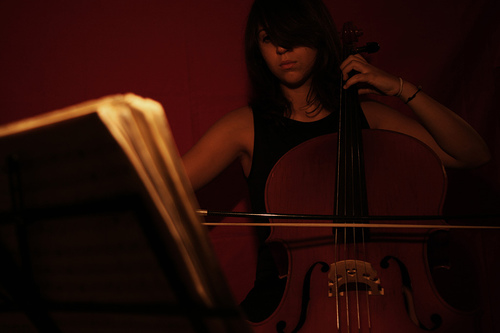

In [64]:
im1